# K-Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. 

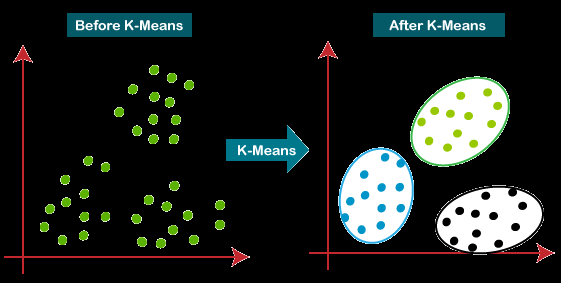

**Image Source** javaTpoint

***Extra Reading***<a href='https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning'> Source: javaTpoint</a>

***Problem Statement:*** Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries.
It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then
replace it with a charged battery from the company.
Lithionpower has a variable pricing model based on driver's driving history. Battery life depends on factors
such as over speeding, distance driven per day, etc.

***Objective:***
• Create a cluster model where drivers can be grouped together based on the driving data.
• Group the datapoints so that drivers will be incentivized based on the cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
battery = pd.read_csv('driver-data.csv')

In [3]:
battery.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
battery.shape

(4000, 3)

In [5]:
battery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
battery.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
battery.duplicated().any()

False

Column - ID does not represent the dataset. Will get rid of it.

In [8]:
battery = battery.drop('id',axis = 1)

In [9]:
battery.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


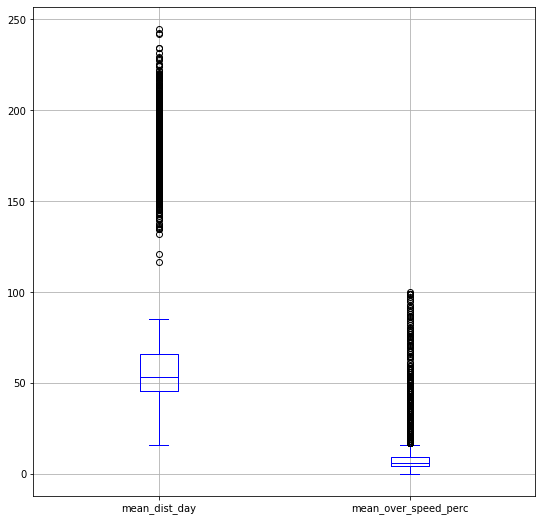

In [10]:
plt.figure(figsize = (9,9))
battery.boxplot(color = 'b')
plt.show()

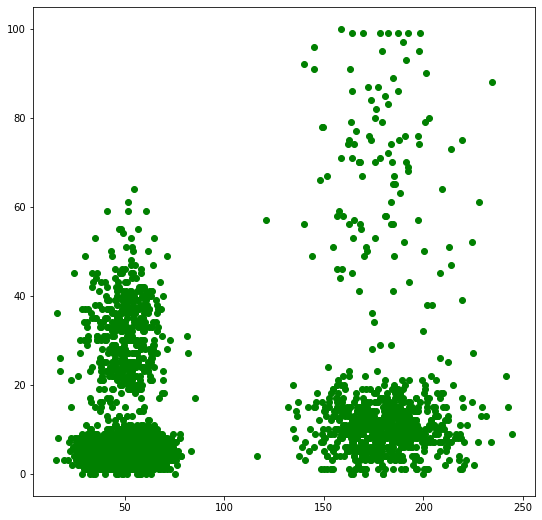

In [11]:
plt.figure(figsize = (9,9))
plt.scatter('mean_dist_day','mean_over_speed_perc',color = 'g', data = battery)
plt.show()

To get optimal number of clusters, we would use elbow method. To do that we have to calculate ineria for a range of clusters.

**Inertia** Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )

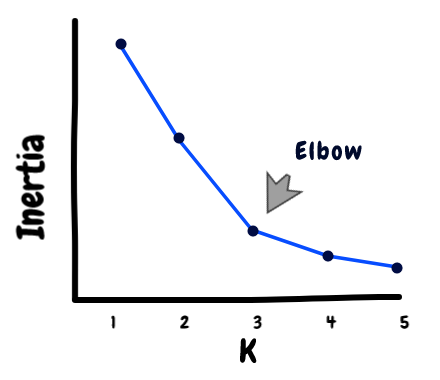

**Reading Material** <li><a href = 'https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819'>Source:TowardsDataScience-Link - 1</a></li>
<li><a href = 'https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a'>Source:TowardsDataScience-Link - 2</a></li>

**Image Source:** TowardsDataScience

### Elbow Method:

In [13]:
from sklearn.cluster import KMeans
inertia_list = []
for num_clusters in np.arange(1,21):
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(battery)
    inertia_list.append(kmeans.inertia_)
print(inertia_list)

[12184626.129627975, 1316420.8509477186, 992634.060670247, 719601.1096991899, 534715.9763248803, 372846.63176658476, 319799.3746391605, 276956.57759222965, 252951.7914541171, 231095.3349866011, 209685.25094959082, 189353.69407177443, 175380.26550208905, 160495.8900203715, 152039.57597593128, 139923.35317122444, 133705.76687249835, 127426.71150681269, 121764.23847090518, 114109.47513950616]


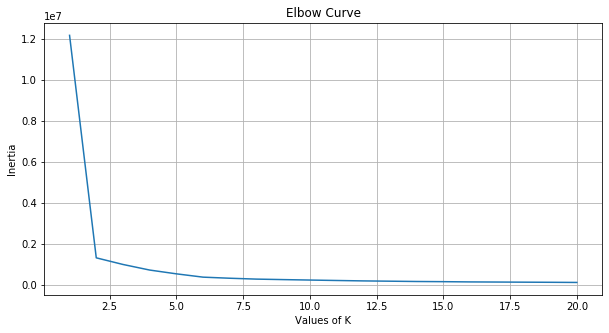

In [14]:
#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

We can take the optimal number of clusters as 2 or less than 5. Ater that the graph becomes linear for increase in clusters.

Can inertia increase with number of clusters?

https://stats.stackexchange.com/questions/494078/kmeans-clustering-can-inertia-increase-with-number-of-clusters

In [15]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(battery)
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 800, 1: 3200}


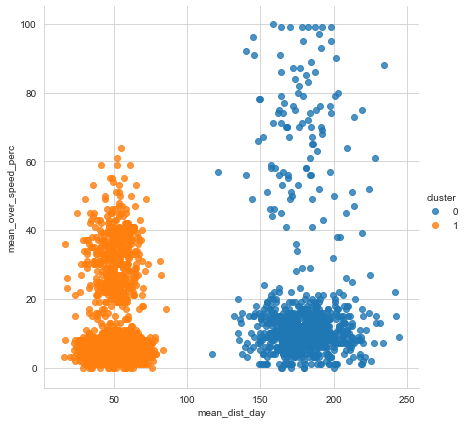

In [18]:
# plot the data 
import seaborn as sns
battery['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=battery, hue='cluster',
           size=6,aspect=1,fit_reg=False)

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(battery)
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 2775, 1: 696, 2: 425, 3: 104}


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


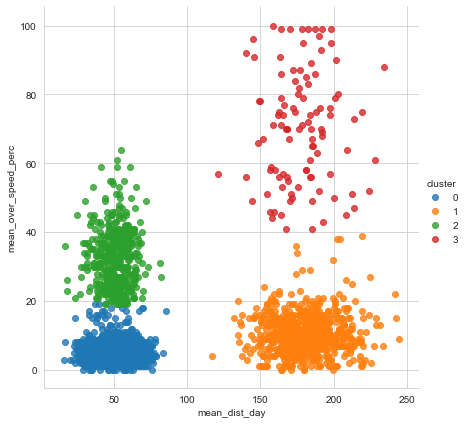

In [20]:
# plot the data 
import seaborn as sns
battery['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=battery, hue='cluster',
           size=6,aspect=1,fit_reg=False)